#Part 1

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 273 kB 4.6 MB/s 
     |████████████████████████████████| 2.7 MB 54.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from Bio import Align
from sklearn.preprocessing import LabelEncoder

In [21]:
# plasma = pd.read_excel('plasma.xlsx')
# naive = pd.read_excel('naive.xlsx')
# memory = pd.read_excel('memory.xlsx')

plasma = pd.read_csv('plasma.txt', delimiter = "\t", on_bad_lines='skip')
naive = pd.read_csv('naive.txt', delimiter = "\t", on_bad_lines='skip')
memory = pd.read_csv('memory.txt', delimiter = "\t", on_bad_lines='skip')

In [22]:
plasma.head()

,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length
0,0_merged_read_SRR3620074.1_1_length=301,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,IGH,F,T,F,T,F,T,IGHV3-7*01,...,175,288,346,378,289,345,GCGAGCGAG,9,GCGGTCCAAGTTAACCC,17
1,2_merged_read_SRR3620074.3_3_length=301,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,IGH,F,T,F,T,F,T,IGHV3-7*01,...,175,288,346,378,289,345,GCGAGCGAG,9,GCGGTCCAAGTTAACCC,17
2,3_merged_read_SRR3620074.4_4_length=301,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...,IGH,F,T,F,T,F,T,IGHV2-26*01,...,178,291,343,375,292,342,GCCCTTTAC,9,CGTACA,6
3,5_merged_read_SRR3620074.6_6_length=301,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,IGH,F,T,F,T,F,T,IGHV3-7*01,...,175,288,346,378,289,345,AGAGGGAGT,9,GCGGTTCAAATTA,13
4,6_merged_read_SRR3620074.7_7_length=301,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,IGH,T,T,F,F,F,T,IGHV4-34*01,...,172,285,343,375,286,342,TTCGGGAACATGTC,14,ACCCCAAGCC,10


In [23]:
pcols = ['v_call', 'j_call', 'v_sequence_alignment', 'v_germline_alignment', 'cdr3', 'productive']

In [24]:
plasma1000 = plasma[pcols][:1000]
plasma1000.head()

,v_call,j_call,v_sequence_alignment,v_germline_alignment,cdr3,productive
0,IGHV3-7*01,IGHJ5*02,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T
1,IGHV3-7*01,IGHJ5*02,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T
2,IGHV2-26*01,IGHJ4*02,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...,CAGGTCACCTTGAAGGAGTCTGGTCCTGTGCTGGTGAAACCCACAG...,GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...,T
3,IGHV3-7*01,IGHJ5*02,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...,T
4,IGHV4-34*01,IGHJ4*02,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...,F


In [ ]:
plasma1000['v_call'] = plasma1000['v_call'].str.split('*').str[0]
plasma1000['j_call'] = plasma1000['j_call'].str.split('*').str[0]

In [ ]:
plasma1000['v_call'].head()

0     IGHV3-7
1     IGHV3-7
2    IGHV2-26
3     IGHV3-7
4    IGHV4-34
Name: v_call, dtype: object

In [ ]:
tup = []
for i in range(len(plasma1000)):
  tup.append((plasma1000['v_call'][i], plasma1000['j_call'][i]))
plasma1000['vj_pair'] = tup

In [ ]:
df = pd.DataFrame(plasma1000['vj_pair'].value_counts())
df = df.reset_index()

In [ ]:
df.head(10)

,index,vj_pair
0,"(IGHV3-7, IGHJ5)",745
1,"(IGHV2-26, IGHJ4)",85
2,"(IGHV3-21, IGHJ4)",24
3,"(IGHV3-30, IGHJ6)",18
4,"(IGHV3-30, IGHJ5)",17
5,"(IGHV4-59, IGHJ3)",16
6,"(IGHV1-2, IGHJ6)",12
7,"(IGHV1-69, IGHJ4)",11
8,"(IGHV5-10-1, IGHJ5)",11
9,"(IGHV3-7, IGHJ6)",10


##1. Analyze the joint usage of V and J genes: for each sequence find the closest germline V and J genes, list of all VJ pairs occurring in the sample, and create a plot (e.g., heatmap) showing the number of sequences for each VJ pair.

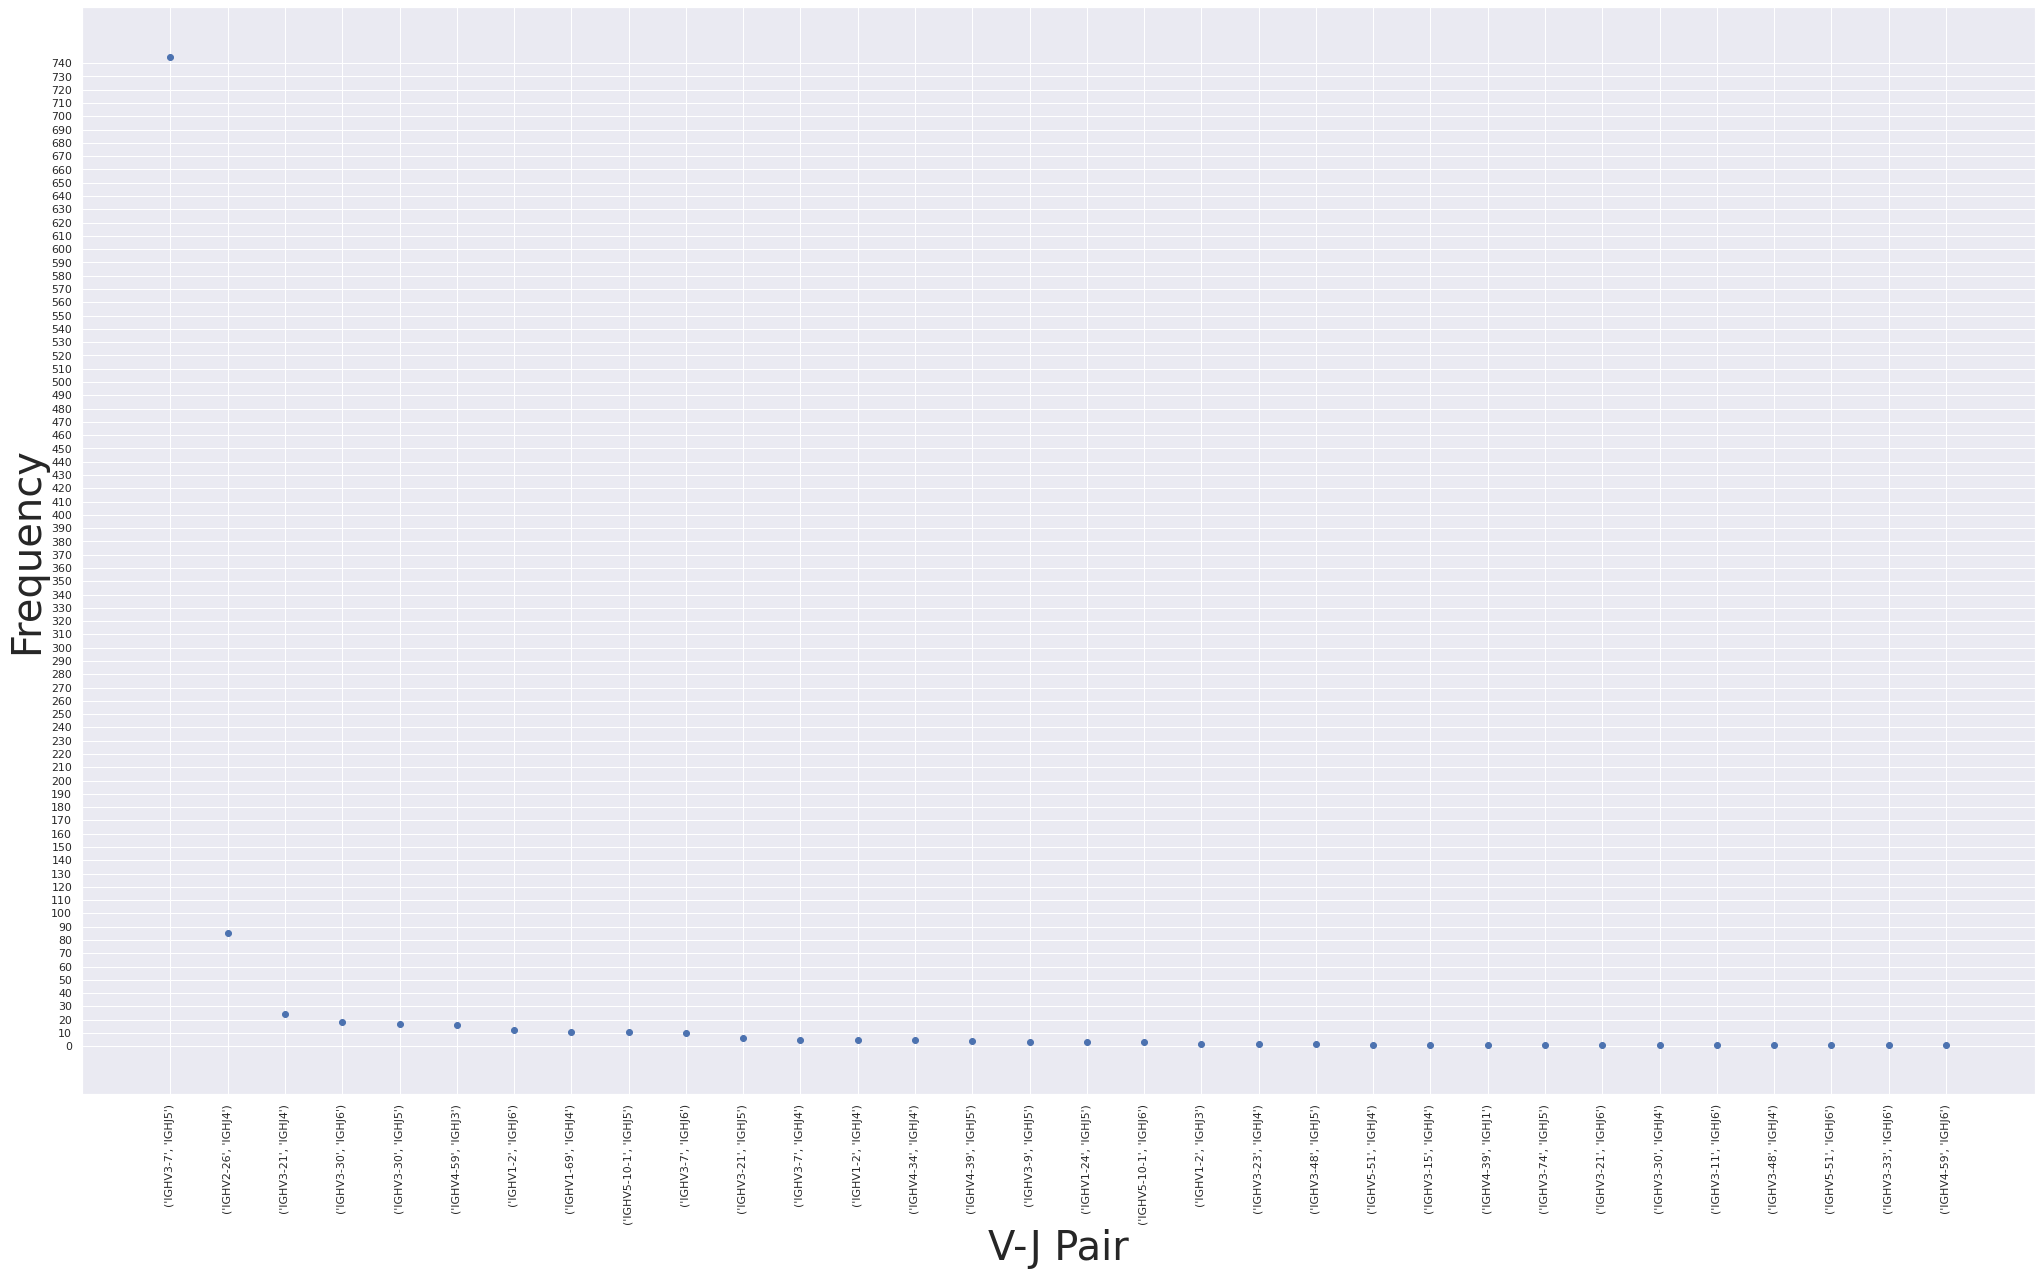

In [ ]:
fig = plt.figure(figsize=(35, 20))
plt.xticks(rotation=90)
_ = plt.scatter([str(i) for i in df['index']], df['vj_pair'])
plt.yticks(np.arange(min(df['vj_pair']-1), max(df['vj_pair']), 10))
plt.xlabel("V-J Pair", fontsize = 40)
plt.ylabel("Frequency", fontsize = 40)
plt.show()

In [ ]:
hm = plasma1000.pivot_table(index=['v_call'], columns=['j_call'], aggfunc='size')

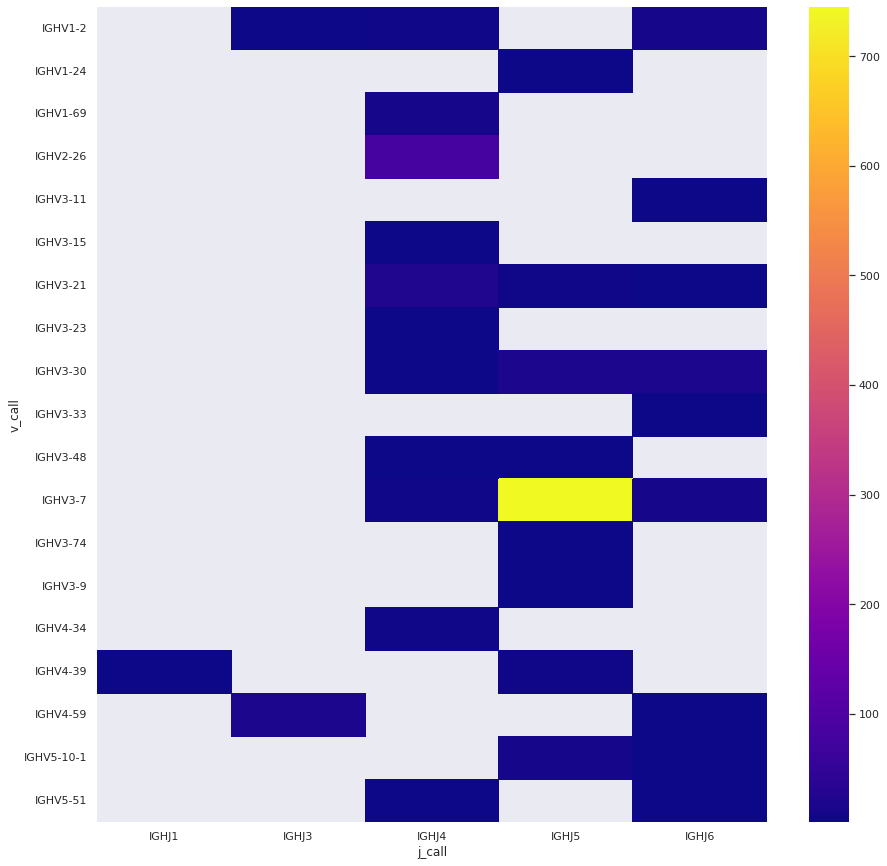

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(hm, cmap='plasma')
plt.show()

In [ ]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 2
aligner.mismatch_score = 0
aligner.open_gap_score = -1.5
aligner.extend_gap_score = -2

In [ ]:
v_pointMutations = []
for i in range(len(plasma1000)):
  alignments = aligner.align(plasma1000['v_sequence_alignment'][i], plasma1000['v_germline_alignment'][i])
  alignment = alignments[0]
  splits = str(alignment).split('\n')
  alignment_str = splits[1]
  v_pointMutations.append(Counter(alignment_str)['.'])

plasma1000['v_point_mutations'] = v_pointMutations

In [ ]:
plasma1000.head(10)

,v_call,j_call,v_sequence_alignment,v_germline_alignment,cdr3,productive,vj_pair,v_point_mutations
0,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",18
1,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",19
2,IGHV2-26,IGHJ4,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...,CAGGTCACCTTGAAGGAGTCTGGTCCTGTGCTGGTGAAACCCACAG...,GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...,T,"(IGHV2-26, IGHJ4)",17
3,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...,T,"(IGHV3-7, IGHJ5)",13
4,IGHV4-34,IGHJ4,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...,F,"(IGHV4-34, IGHJ4)",11
5,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGACGAGGGAGCTACGGTGACTACGCGGTCCAAGTTAACAACT...,T,"(IGHV3-7, IGHJ5)",12
6,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",17
7,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",18
8,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",18
9,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGAAGAGGGAGCTATGGTGACTATGCAGTCCAAGTTAACAGTT...,T,"(IGHV3-7, IGHJ5)",21


In [ ]:
vpm = plasma1000[['v_call', 'v_point_mutations']]

In [ ]:
vpm.head()

,v_call,v_point_mutations
0,IGHV3-7,18
1,IGHV3-7,19
2,IGHV2-26,17
3,IGHV3-7,13
4,IGHV4-34,11


In [ ]:
vpm.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]

,v_call,v_point_mutations
11,IGHV3-7,13781
3,IGHV2-26,1350
8,IGHV3-30,662
6,IGHV3-21,468
0,IGHV1-2,364
16,IGHV4-59,319
17,IGHV5-10-1,229
2,IGHV1-69,164
13,IGHV3-9,101
14,IGHV4-34,92


In [ ]:
v_genes = vpm.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]['v_call']

In [ ]:
vpm.loc[vpm['v_call'].isin(v_genes)]

,v_call,v_point_mutations
0,IGHV3-7,18
1,IGHV3-7,19
2,IGHV2-26,17
3,IGHV3-7,13
4,IGHV4-34,11
...,...,...
995,IGHV3-7,22
996,IGHV3-21,11
997,IGHV3-7,16
998,IGHV2-26,14


## 2. Find 10 most used V genes in the sample and analyze their SHM rate.
For each gene, analyze sequences aligned to it and compute the
number of differences in each alignment. SHM rate is the distribution
of the number of differences. Visualize SHM rates for 10 most used V genes in each sample (e.g., using boxplot where x-axis = V genes, y-axis = SHM rate).

##COMMENT: I consider v_point_mutations to be the same as SHM rate. 

In [ ]:
# top10pm = vpm.groupby('vj_pair').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]
# top10pm

In [ ]:
top10pm = vpm.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]
top10pm

,v_call,v_point_mutations
11,IGHV3-7,13781
3,IGHV2-26,1350
8,IGHV3-30,662
6,IGHV3-21,468
0,IGHV1-2,364
16,IGHV4-59,319
17,IGHV5-10-1,229
2,IGHV1-69,164
13,IGHV3-9,101
14,IGHV4-34,92


In [ ]:
# sns.set(rc={'figure.figsize':(25, 25)})
# _ = sns.boxplot(data=plasma1000, x='vj_pair', y='v_point_mutations')
# _.set_xticklabels(labels=plasma1000['vj_pair'],rotation=60)
# # Show the plot
# plt.show()

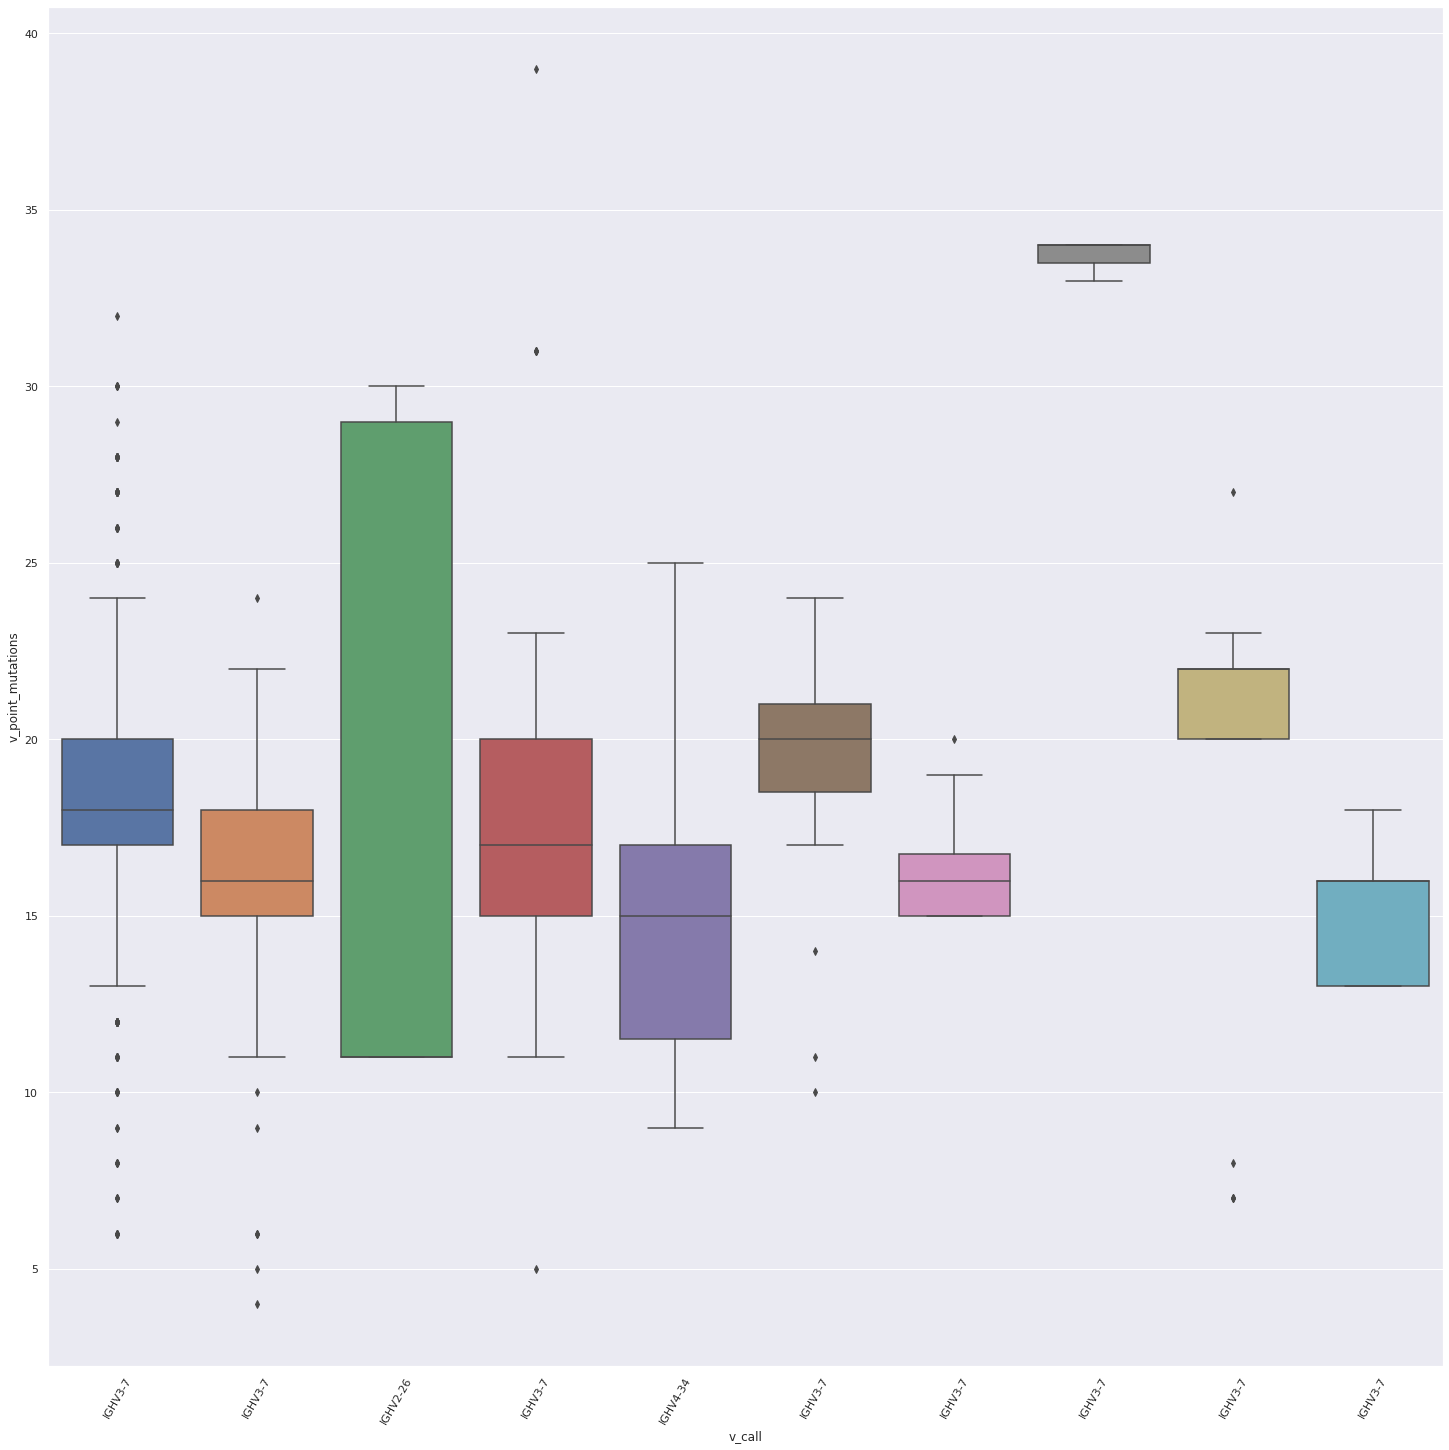

In [ ]:
sns.set(rc={'figure.figsize':(25, 25)})
_ = sns.boxplot(data=vpm.loc[vpm['v_call'].isin(v_genes)], x='v_call', y='v_point_mutations')
_.set_xticklabels(labels=vpm.loc[vpm['v_call'].isin(v_genes)]['v_call'],rotation=60)
plt.show()

In [ ]:
len(plasma1000['cdr3'][0])

57

In [ ]:
cdr3Sizes = [len(x) for x in plasma1000['cdr3']]
plasma1000['cdr3_length'] = cdr3Sizes

In [ ]:
plasma1000.columns

Index(['v_call', 'j_call', 'v_sequence_alignment', 'v_germline_alignment',
       'cdr3', 'productive', 'vj_pair', 'v_point_mutations', 'cdr3_length'],
      dtype='object')

In [ ]:
plasma1000.head()

,v_call,j_call,v_sequence_alignment,v_germline_alignment,cdr3,productive,vj_pair,v_point_mutations,cdr3_length
0,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",18,57
1,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T,"(IGHV3-7, IGHJ5)",19,57
2,IGHV2-26,IGHJ4,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...,CAGGTCACCTTGAAGGAGTCTGGTCCTGTGCTGGTGAAACCCACAG...,GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...,T,"(IGHV2-26, IGHJ4)",17,51
3,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...,T,"(IGHV3-7, IGHJ5)",13,57
4,IGHV4-34,IGHJ4,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...,F,"(IGHV4-34, IGHJ4)",11,57


In [ ]:
plasma1000[['cdr3', 'cdr3_length', 'vj_pair', 'v_call']].head()

,cdr3,cdr3_length,vj_pair,v_call
0,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,57,"(IGHV3-7, IGHJ5)",IGHV3-7
1,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,57,"(IGHV3-7, IGHJ5)",IGHV3-7
2,GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...,51,"(IGHV2-26, IGHJ4)",IGHV2-26
3,GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...,57,"(IGHV3-7, IGHJ5)",IGHV3-7
4,GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...,57,"(IGHV4-34, IGHJ4)",IGHV4-34


##3. Visualize distributions of CDR3 lengths.



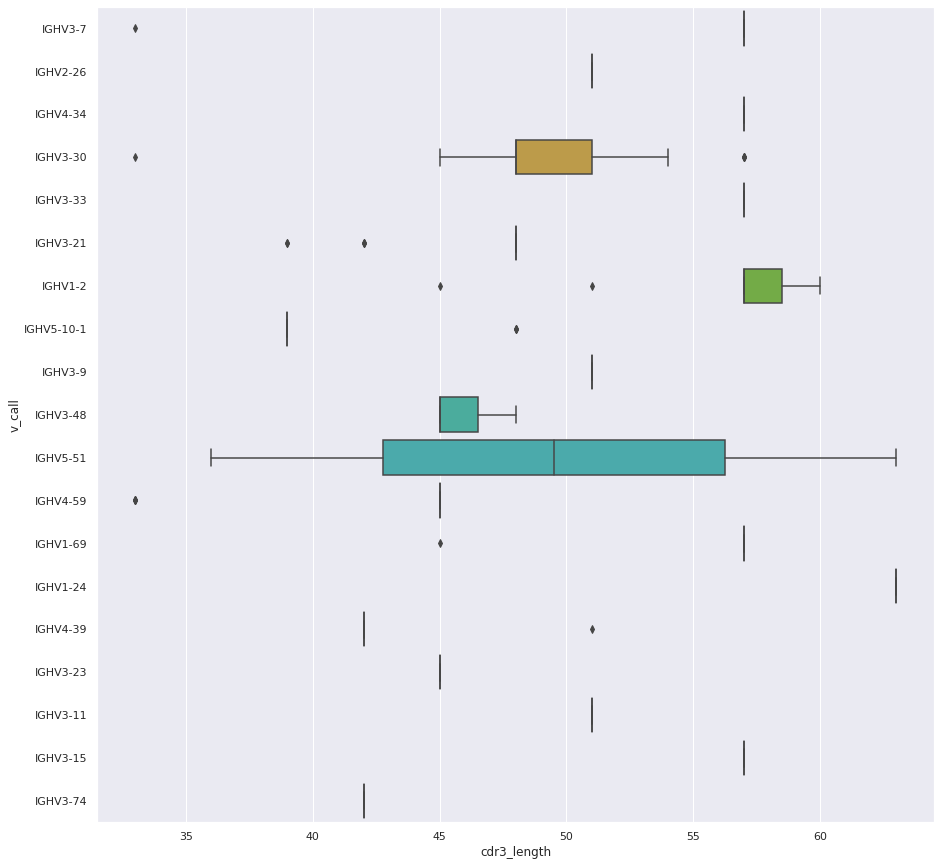

In [ ]:
sns.set(rc={'figure.figsize':(15, 15)})
_ = sns.boxplot(data=plasma1000, x='cdr3_length', y='v_call')

In [ ]:
# pdv = plasma1000[['vj_pair', 'productive']]
pdv = plasma1000[['v_call', 'productive']]

In [ ]:
pdv['productive'].replace(['T', 'F'], [1, 0], inplace=True)

In [ ]:
pdv.head()

##4. Compute the fraction of non-productive sequences in the sample. Both IgBlast and DiversityAnalyzer report productiveness of input sequences as a part of the output.

In [ ]:
# non-productive seqs
1 - pdv['productive'].sum()/len(pdv['productive'])

0.03200000000000003

#PART 2

##1. Compare VJ usages in three samples and find samples with the smallest and largest number of VJ combinations.

####PLASMA

In [ ]:
plas = pd.read_excel('plasma.xlsx')[:1000]

In [ ]:
pcols

['v_call',
 'j_call',
 'v_sequence_alignment',
 'v_germline_alignment',
 'cdr3',
 'productive']

In [ ]:
plas1 = plas[pcols]

In [ ]:
plas1['v_call'] = plas1['v_call'].str.split('*').str[0]
plas1['j_call'] = plas1['j_call'].str.split('*').str[0]

In [ ]:
plas1.head()

,v_call,j_call,v_sequence_alignment,v_germline_alignment,cdr3,productive
0,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T
1,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...,T
2,IGHV2-26,IGHJ4,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCAAAG...,CAGGTCACCTTGAAGGAGTCTGGTCCTGTGCTGGTGAAACCCACAG...,GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...,T
3,IGHV3-7,IGHJ5,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...,T
4,IGHV4-34,IGHJ4,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...,F


In [ ]:
tup = []
for i in range(len(plas1)):
  tup.append((plas1['v_call'][i], plas1['j_call'][i]))
plas1['vj_pair'] = tup

In [ ]:
df = pd.DataFrame(plas1['vj_pair'].value_counts())
# df = df.reset_index()

##Largest # of VJ combos in PLASMA data


In [ ]:
df.sort_values('vj_pair', ascending=False).head(10)

,vj_pair
"(IGHV3-7, IGHJ5)",745
"(IGHV2-26, IGHJ4)",85
"(IGHV3-21, IGHJ4)",24
"(IGHV3-30, IGHJ6)",18
"(IGHV3-30, IGHJ5)",17
"(IGHV4-59, IGHJ3)",16
"(IGHV1-2, IGHJ6)",12
"(IGHV1-69, IGHJ4)",11
"(IGHV5-10-1, IGHJ5)",11
"(IGHV3-7, IGHJ6)",10


##Smallest # of VJ combinations in PLASMA data




In [ ]:
df.sort_values('vj_pair', ascending=True).head(10)

,vj_pair
"(IGHV4-59, IGHJ6)",1
"(IGHV5-51, IGHJ6)",1
"(IGHV3-48, IGHJ4)",1
"(IGHV3-11, IGHJ6)",1
"(IGHV3-30, IGHJ4)",1
"(IGHV3-21, IGHJ6)",1
"(IGHV3-74, IGHJ5)",1
"(IGHV4-39, IGHJ1)",1
"(IGHV3-15, IGHJ4)",1
"(IGHV5-51, IGHJ4)",1


####NAIVE

In [ ]:
naive1000 = naive[:-2]
naive1000.head()

,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length
0,0_merged_read_SRR3620035.1_1_length=301,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...,IGH,F,T,F,T,F,T,IGHV3-49*03,...,181.0,294.0,343.0,375.0,295.0,342.0,TGGGGCGGGGAC,12.0,AACATTTG,8.0
1,1_merged_read_SRR3620035.2_2_length=301,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGH,F,T,F,T,F,T,IGHV3-33*08,...,175.0,288.0,343.0,375.0,289.0,342.0,TCTACTGCATA,11.0,CCAC,4.0
2,2_merged_read_SRR3620035.3_3_length=301,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGH,F,T,F,T,F,T,IGHV4-59*01,...,172.0,285.0,319.0,351.0,286.0,318.0,TCGAAGGC,8.0,NaN,NaN
3,3_merged_read_SRR3620035.4_4_length=301,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGH,F,T,F,T,F,T,IGHV4-4*02,...,175.0,288.0,340.0,372.0,289.0,339.0,ACCTGTTTCC,10.0,CCCGG,5.0
4,4_merged_read_SRR3620035.5_5_length=301,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCACAG...,IGH,F,T,F,T,F,T,IGHV2-26*01,...,178.0,291.0,355.0,387.0,292.0,354.0,TAGGGGG,7.0,TCTTCTGGA,9.0


In [ ]:
naive1 = naive1000[pcols]

In [ ]:
naive1['v_call'] = naive1['v_call'].str.split('*').str[0]
naive1['j_call'] = naive1['j_call'].str.split('*').str[0]

In [ ]:
tup = []
for i in range(len(naive1)):
  tup.append((naive1['v_call'][i], naive1['j_call'][i]))
naive1['vj_pair'] = tup

In [ ]:
naive1.head()

,v_call,j_call,v_sequence_alignment,v_germline_alignment,cdr3,productive,vj_pair
0,IGHV3-49,IGHJ4,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCAGGGC...,ACTGGATGGGGCGGGGACGTGGGAGCAACATTTGACTACCTTGATTCC,T,"(IGHV3-49, IGHJ4)"
1,IGHV3-33,IGHJ6,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,GCGAGAGATCTACTGCATATGGGAGCTCCACACTACTACTACGGTA...,T,"(IGHV3-33, IGHJ6)"
2,IGHV4-59,IGHJ6,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,GCGAGAGATCGAAGGCACTACGGTATGGACGTC,T,"(IGHV4-59, IGHJ6)"
3,IGHV4-4,IGHJ2,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,GCGAGAGAACCTGTTTCCTATAGTGGGAGCCCCGGCTGGTACTTCG...,T,"(IGHV4-4, IGHJ2)"
4,IGHV2-26,IGHJ2,CAGGTCACCTTGAAGGAGTCTGGTCCTACGCTGGTGAAACCCACAG...,CAGGTCACCTTGAAGGAGTCTGGTCCTGTGCTGGTGAAACCCACAG...,GCCCGGATTAGGGGGTACTATGATAGGAGTGGATTCTACTACTCTT...,T,"(IGHV2-26, IGHJ2)"


In [ ]:
naive1.columns

Index(['v_call', 'j_call', 'v_sequence_alignment', 'v_germline_alignment',
       'cdr3', 'productive', 'vj_pair'],
      dtype='object')

In [ ]:
df = pd.DataFrame(naive1['vj_pair'].value_counts())

##Largest # of VJ combinations in NAIVE data


In [ ]:
df.sort_values('vj_pair', ascending=False).head(10)

,vj_pair
"(IGHV4-59, IGHJ4)",126
"(IGHV4-34, IGHJ4)",37
"(IGHV1-46, IGHJ4)",35
"(IGHV4-39, IGHJ4)",30
"(IGHV1-18, IGHJ4)",29
"(IGHV3-21, IGHJ4)",23
"(IGHV3-23, IGHJ4)",23
"(IGHV4-59, IGHJ6)",22
"(IGHV3-33, IGHJ4)",21
"(IGHV1-69, IGHJ4)",20


##Smallest # of VJ combinations in NAIVE data

---



In [ ]:
df.sort_values('vj_pair', ascending=True).head(10)

,vj_pair
"(IGHV2-5, IGHJ5)",1
"(IGHV1-24, IGHJ5)",1
"(IGHV3-30-3, IGHJ5)",1
"(IGHV4-31, IGHJ1)",1
"(IGHV4-30-2, IGHJ4)",1
"(IGHV6-1, IGHJ6)",1
"(IGHV4-59, IGHJ2)",1
"(IGHV1-24, IGHJ3)",1
"(IGHV4-59, IGHJ1)",1
"(IGHV2-26, IGHJ4)",1


####Memory

In [ ]:
memory.head()

,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,...,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length
0,0_merged_read_SRR3620032.1_1_length=300,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGG...,IGH,F,T,F,T,F,T,"IGHV1-2*02,IGHV1-2*07",...,175,288,325,357,289,324,TCTTGCTAAC,10,TCTG,4.0
1,1_merged_read_SRR3620032.2_2_length=300,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,IGH,F,T,F,T,F,T,"IGHV3-23*01,IGHV3-23D*01",...,175,288,328,360,289,327,GTCTTAA,7,GC,2.0
2,2_merged_read_SRR3620032.3_3_length=300,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGH,F,T,F,T,F,T,IGHV4-39*07,...,178,291,319,351,292,318,AA,2,TCGCCCGCGG,10.0
3,3_merged_read_SRR3620032.4_4_length=300,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGG...,IGH,T,T,F,F,F,T,IGHV1-2*04,...,175,294,337,369,295,336,GGGGG,5,GAGGC,5.0
4,4_merged_read_SRR3620032.5_5_length=300,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,IGH,F,T,F,T,F,T,IGHV5-51*01,...,175,288,331,363,289,330,CATTACGGCTGA,12,CCT,3.0


In [ ]:
mem1 = memory[pcols]

In [ ]:
mem1['v_call'] = mem1['v_call'].str.split('*').str[0]
mem1['j_call'] = mem1['j_call'].str.split('*').str[0]

tup = []
for i in range(len(mem1)):
  tup.append((mem1['v_call'][i], mem1['j_call'][i]))
mem1['vj_pair'] = tup

df = pd.DataFrame(mem1['vj_pair'].value_counts())

##Largest # of VJ combinations in MEMORY data

In [ ]:
df.sort_values('vj_pair', ascending=False).head(10)

,vj_pair
"(IGHV3-30, IGHJ4)",64
"(IGHV3-23, IGHJ4)",62
"(IGHV3-7, IGHJ4)",55
"(IGHV1-18, IGHJ4)",33
"(IGHV5-51, IGHJ4)",33
"(IGHV3-53, IGHJ4)",26
"(IGHV1-2, IGHJ4)",24
"(IGHV1-8, IGHJ4)",24
"(IGHV3-23, IGHJ3)",21
"(IGHV3-66, IGHJ4)",19


##Smallest # of VJ combinations in MEMORY data

In [ ]:
df.sort_values('vj_pair', ascending=True).head(10)

,vj_pair
"(IGHV4-4, IGHJ6)",1
"(IGHV1-3, IGHJ6)",1
"(IGHV5-10-1, IGHJ5)",1
"(IGHV4-38-2, IGHJ6)",1
"(IGHV3-7, IGHJ1)",1
"(IGHV5-51, IGHJ1)",1
"(IGHV6-1, IGHJ6)",1
"(IGHV1-24, IGHJ3)",1
"(IGHV3-74, IGHJ3)",1
"(IGHV3-43, IGHJ6)",1


##2. Compare distributions of CDR3 lengths and explain why CDR3 lengths in the PLASMA sample differ from the NAIVE and MEMORY samples.

##COMMENT: cdr3 length in the plasma data is the least normal

In [ ]:
cdr3Sizes = [len(x) for x in naive1['cdr3']]
naive1['cdr3_length'] = cdr3Sizes

In [ ]:
cdr3Sizes = [len(x) for x in mem1['cdr3']]
mem1['cdr3_length'] = cdr3Sizes

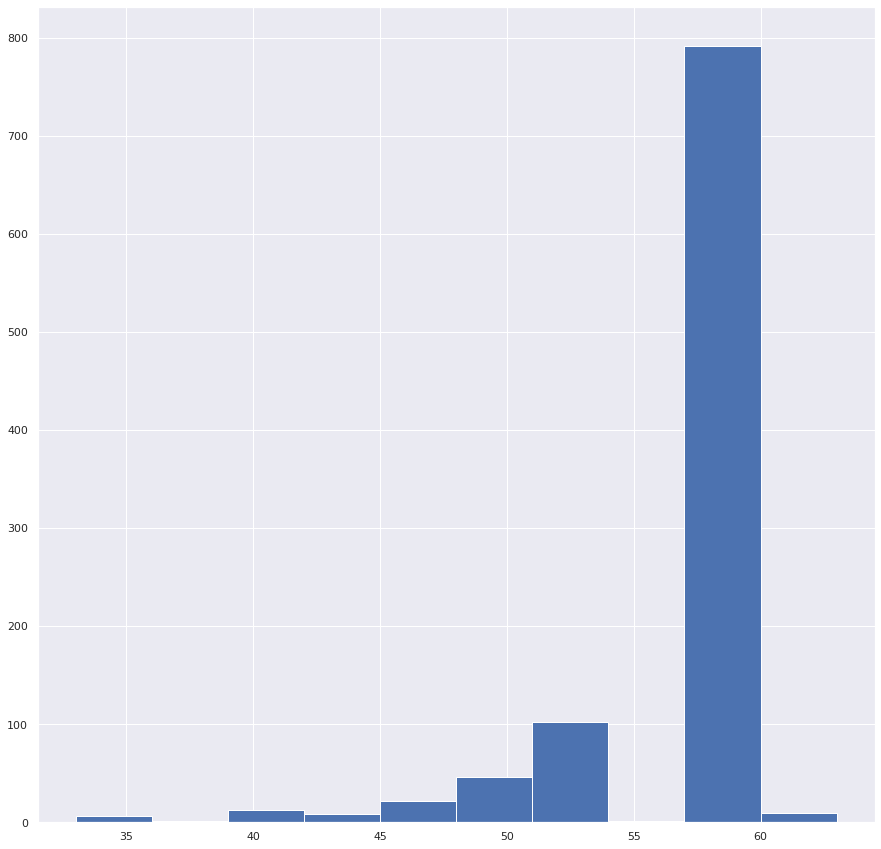

In [ ]:
_ = plasma1000['cdr3_length'].hist()

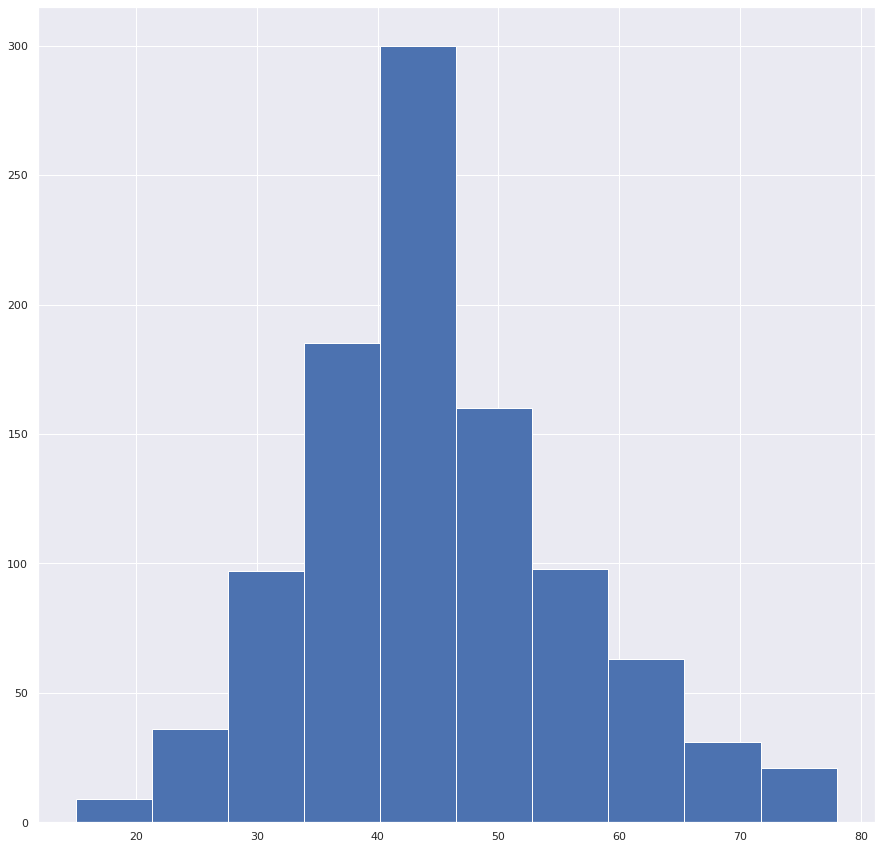

In [ ]:
_ = naive1['cdr3_length'].hist()

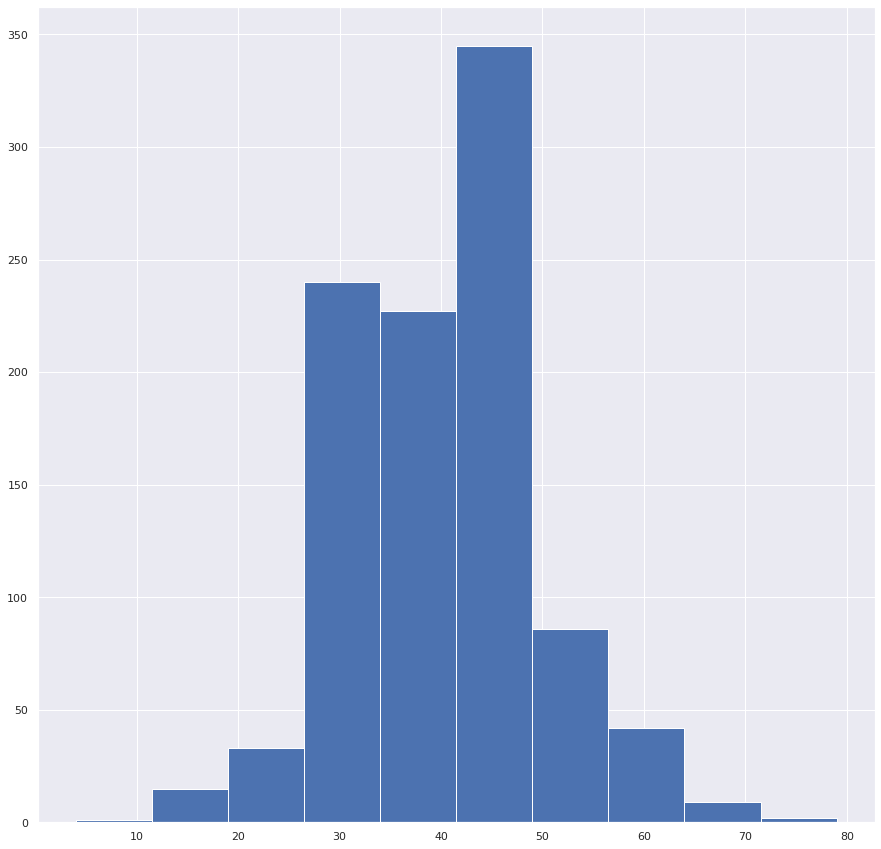

In [ ]:
_ = mem1['cdr3_length'].hist()

##Explanation: 

##3. Compare mutability of V genes, find samples with the smallest and highest mutability, and provide a biological explanation of differences between samples.

In [ ]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 2
aligner.mismatch_score = 0
aligner.open_gap_score = -1.5
aligner.extend_gap_score = -2

v_pointMutations = []
for i in range(len(naive1)):
  alignments = aligner.align(naive1['v_sequence_alignment'][i], naive1['v_germline_alignment'][i])
  alignment = alignments[0]
  splits = str(alignment).split('\n')
  alignment_str = splits[1]
  v_pointMutations.append(Counter(alignment_str)['.'])

naive1['v_point_mutations'] = v_pointMutations
vpm_naive = naive1[['v_call', 'v_point_mutations']]
naive_pm_l = vpm_naive.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)#[:10] -- LARGEST first
naive_pm_s = vpm_naive.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=True)


In [ ]:
naive_pm_l.head(10)

,v_call,v_point_mutations
36,IGHV4-59,1505
4,IGHV1-46,332
15,IGHV3-23,308
0,IGHV1-18,219
34,IGHV4-39,190
6,IGHV1-69,148
13,IGHV3-15,121
38,IGHV5-51,118
14,IGHV3-21,111
33,IGHV4-34,105


In [ ]:
naive_pm_s.head(10)

,v_call,v_point_mutations
40,IGHV7-4-1,2
23,IGHV3-64D,2
27,IGHV3-73,2
5,IGHV1-58,3
37,IGHV5-10-1,4
19,IGHV3-43,5
39,IGHV6-1,8
2,IGHV1-24,14
26,IGHV3-72,17
10,IGHV2-70,19


In [ ]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 2
aligner.mismatch_score = 0
aligner.open_gap_score = -1.5
aligner.extend_gap_score = -2

v_pointMutations = []
for i in range(len(mem1)):
  alignments = aligner.align(mem1['v_sequence_alignment'][i], mem1['v_germline_alignment'][i])
  alignment = alignments[0]
  splits = str(alignment).split('\n')
  alignment_str = splits[1]
  v_pointMutations.append(Counter(alignment_str)['.'])

mem1['v_point_mutations'] = v_pointMutations
vpm_mem = mem1[['v_call', 'v_point_mutations']]
memory_pm_l = vpm_mem.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)#[:10] -- LARGEST first
memory_pm_s = vpm_mem.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=True)

In [ ]:
memory_pm_l.head(10)

,v_call,v_point_mutations
16,IGHV3-23,2105
17,IGHV3-30,1406
1,IGHV1-2,1034
43,IGHV5-51,935
28,IGHV3-7,899
0,IGHV1-18,897
6,IGHV1-69,759
27,IGHV3-66,615
36,IGHV4-34,536
18,IGHV3-30-3,536


In [ ]:
memory_pm_s.head(10)

,v_call,v_point_mutations
15,IGHV3-22,1
25,IGHV3-64,14
45,IGHV7-4-1,15
7,IGHV1-69-2,27
21,IGHV3-43D,34
23,IGHV3-49,48
30,IGHV3-73,49
5,IGHV1-58,56
29,IGHV3-72,63
33,IGHV4-30-2,69


In [ ]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 2
aligner.mismatch_score = 0
aligner.open_gap_score = -1.5
aligner.extend_gap_score = -2

v_pointMutations = []
for i in range(len(plasma1000)):
  alignments = aligner.align(plasma1000['v_sequence_alignment'][i], plasma1000['v_germline_alignment'][i])
  alignment = alignments[0]
  splits = str(alignment).split('\n')
  alignment_str = splits[1]
  v_pointMutations.append(Counter(alignment_str)['.'])

plasma1000['v_point_mutations'] = v_pointMutations
vpm_plasma = plasma1000[['v_call', 'v_point_mutations']]
plasma_l = vpm_plasma.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)#[:10] -- LARGEST first
plasma_s = vpm_plasma.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=True)

In [ ]:
plasma_l.head(10)

,v_call,v_point_mutations
11,IGHV3-7,13781
3,IGHV2-26,1350
8,IGHV3-30,662
6,IGHV3-21,468
0,IGHV1-2,364
16,IGHV4-59,319
17,IGHV5-10-1,229
2,IGHV1-69,164
13,IGHV3-9,101
14,IGHV4-34,92


In [ ]:
plasma_s.head(10)

,v_call,v_point_mutations
4,IGHV3-11,11
18,IGHV5-51,15
5,IGHV3-15,22
12,IGHV3-74,25
9,IGHV3-33,30
1,IGHV1-24,56
7,IGHV3-23,57
10,IGHV3-48,68
15,IGHV4-39,85
14,IGHV4-34,92


##Explanation: 
##By far, plasma has more mutations than memory and naive. And memory more than naive.The observation that memory B cells consistently have fewer mutations than plasma cells indicate that the former are generated before affinity maturation has allowed for the production of high-affinity B cell receptors. This applies to memory and naive cells. Precedence in cell type formation may govern the mutability of cell types. 
# https://www.frontiersin.org/articles/10.3389/fimmu.2019.01787/full


##4. Find V gene (or V genes) that are present among 10 top used V genes in each sample and visualize their SHM rates across three samples (i.e., x-axis = sample, y = SHM rate). Describe observed patterns (what samples have the highest and the lowest SHM rates).

##Observations: Some the same genes mutate in each of these cells. Also, memory and plasma cells have a much larger mutability variance than naive cells.

In [ ]:
# VISUALIZE each point mutation df with boxplot
# WHICH file or file df/s have lowest shm rate 

In [ ]:
v_genes_naive = vpm_naive.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]['v_call']
vpm_naive.loc[vpm_naive['v_call'].isin(v_genes_naive)]

,v_call,v_point_mutations
2,IGHV4-59,0
5,IGHV3-21,2
10,IGHV5-51,0
11,IGHV1-18,1
12,IGHV5-51,13
...,...,...
991,IGHV3-21,0
992,IGHV5-51,0
993,IGHV4-34,0
996,IGHV4-59,0


In [ ]:
v_genes_mem = vpm_mem.groupby('v_call').sum().reset_index().sort_values('v_point_mutations', ascending=False)[:10]['v_call']
vpm_mem.loc[vpm_mem['v_call'].isin(v_genes_mem)]

,v_call,v_point_mutations
0,IGHV1-2,11
1,IGHV3-23,13
3,IGHV1-2,28
4,IGHV5-51,11
6,IGHV3-7,1
...,...,...
989,IGHV1-2,13
990,IGHV3-7,4
993,IGHV5-51,27
998,IGHV1-2,22


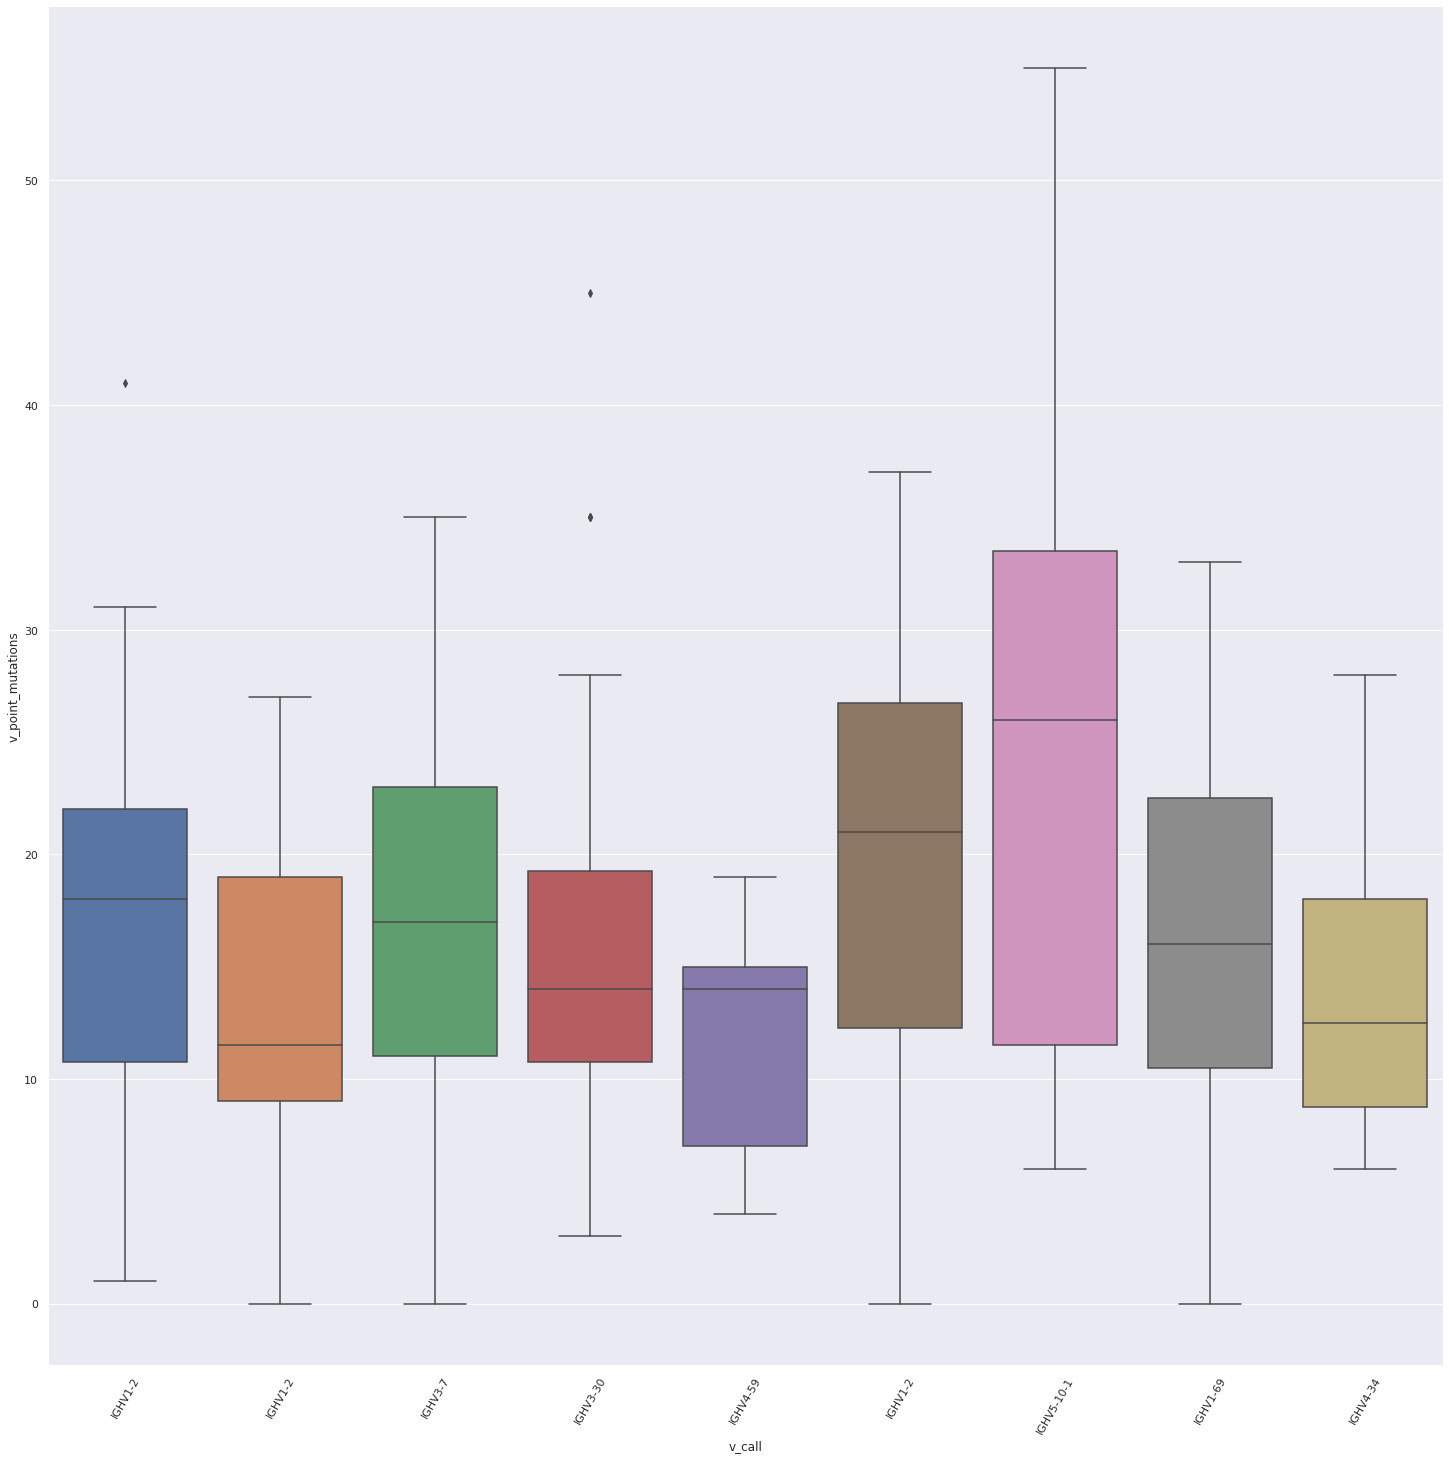

In [ ]:
# PLASMA
sns.set(rc={'figure.figsize':(25, 25)})
_ = sns.boxplot(data=vpm.loc[vpm['v_call'].isin(v_genes)], x='v_call', y='v_point_mutations')
_.set_xticklabels(labels=vpm.loc[vpm['v_call'].isin(v_genes)]['v_call'],rotation=60)
plt.show()

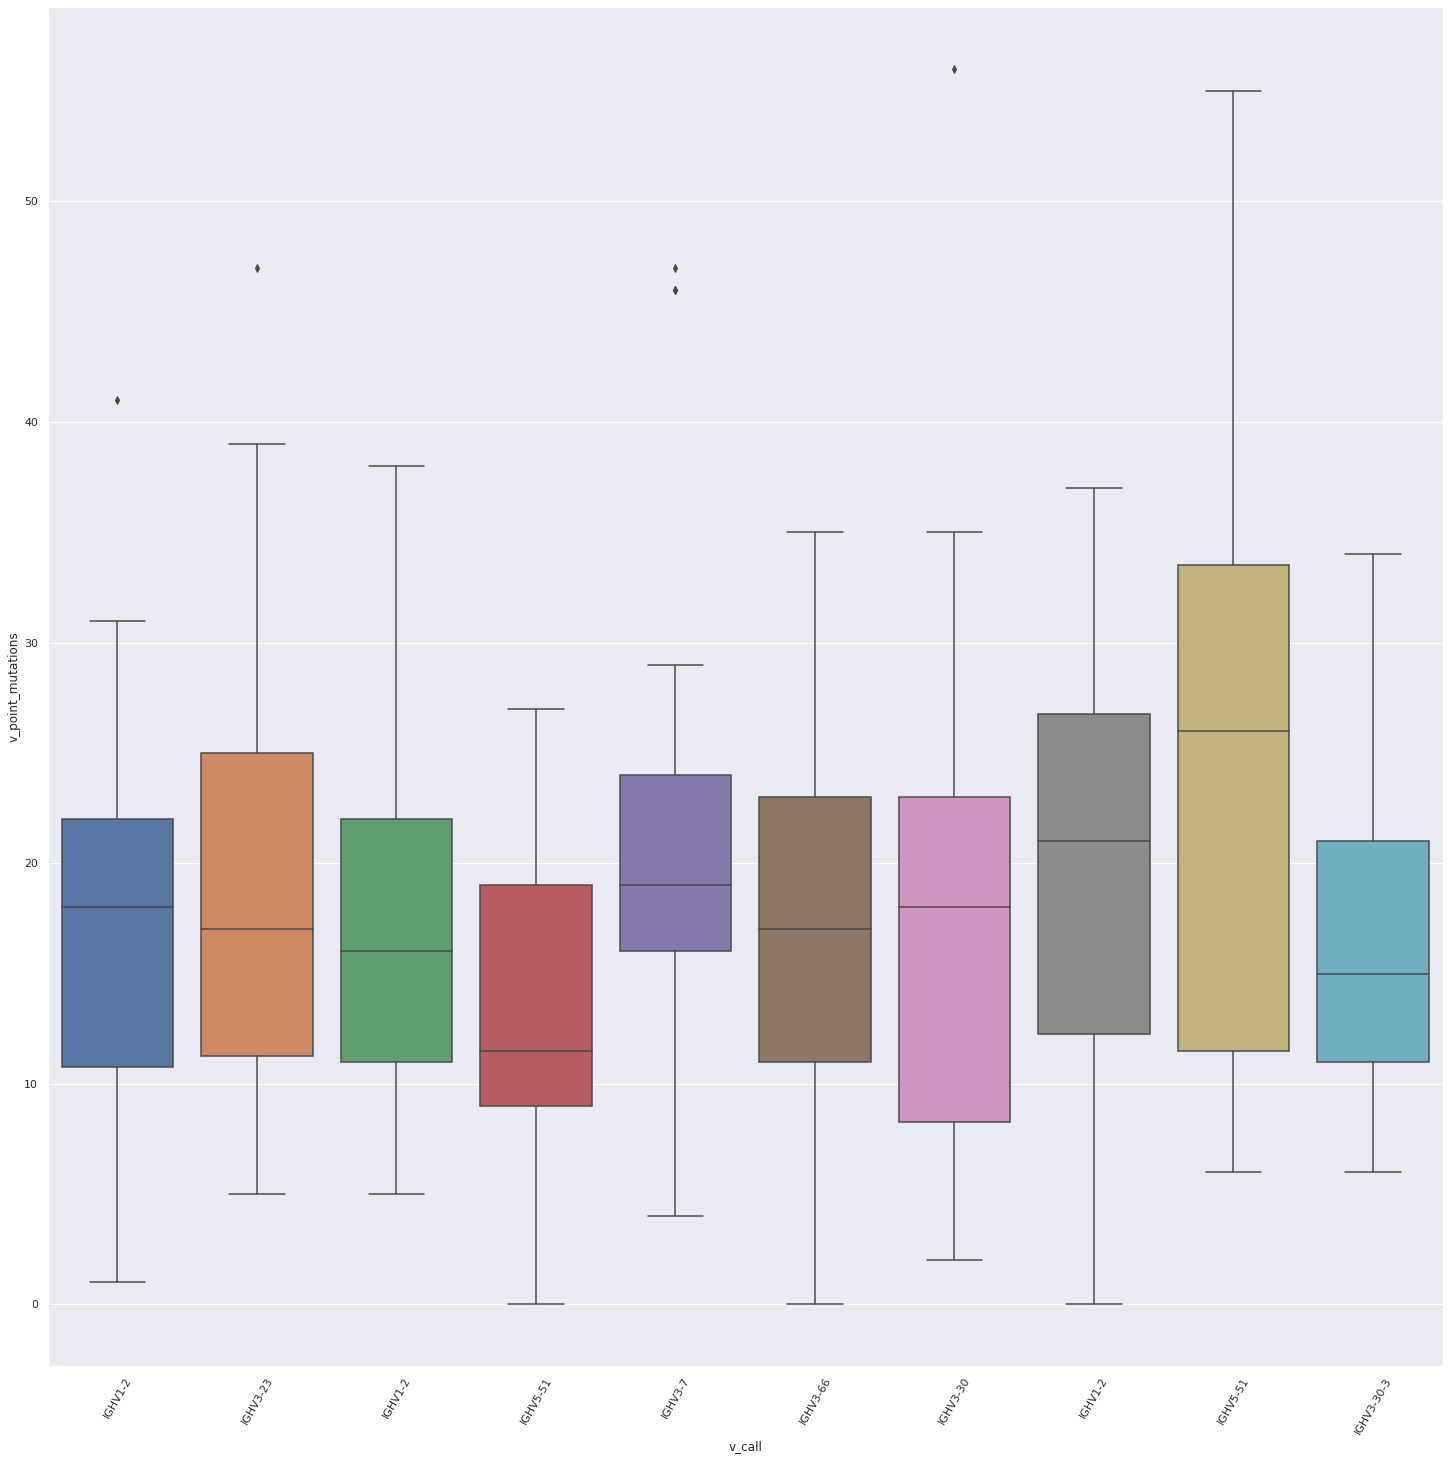

In [ ]:
sns.set(rc={'figure.figsize':(25, 25)})
_ = sns.boxplot(data=vpm_mem.loc[vpm_mem['v_call'].isin(v_genes_mem)], x='v_call', y='v_point_mutations')
_.set_xticklabels(labels=vpm_mem.loc[vpm_mem['v_call'].isin(v_genes_mem)]['v_call'],rotation=60)
plt.show()

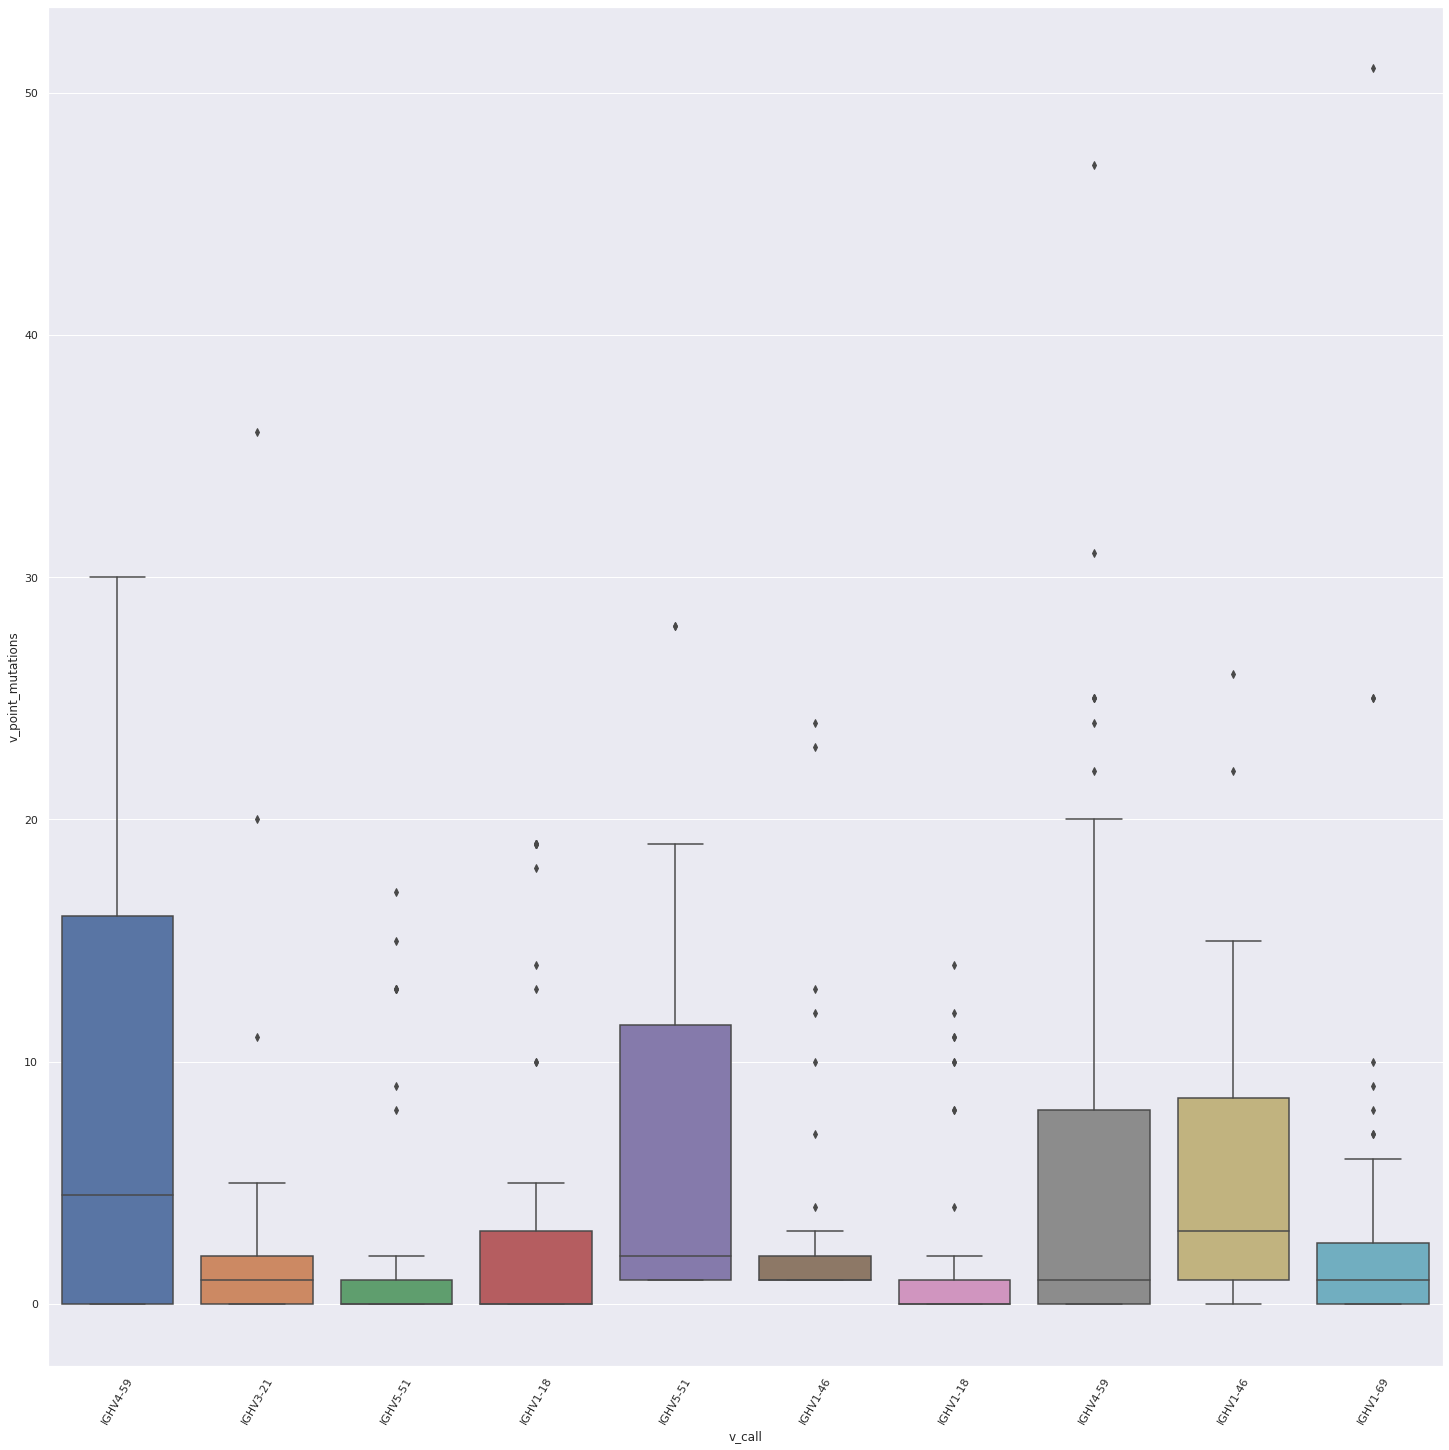

In [ ]:
sns.set(rc={'figure.figsize':(25, 25)})
_ = sns.boxplot(data=vpm_naive.loc[vpm_naive['v_call'].isin(v_genes_naive)], x='v_call', y='v_point_mutations')
_.set_xticklabels(labels=vpm_naive.loc[vpm_naive['v_call'].isin(v_genes_naive)]['v_call'],rotation=60)
plt.show()

5. Compare fractions of productive sequences in all samples.

In [ ]:
naive_pdv = naive1[['vj_pair', 'productive']]
naive_pdv['productive'].replace(['T', 'F'], [1, 0], inplace=True)

mem_pdv = mem1[['vj_pair', 'productive']]
mem_pdv['productive'].replace(['T', 'F'], [1, 0], inplace=True)

In [ ]:
print('naive unproductivity:', 1 - naive_pdv['productive'].sum()/len(naive_pdv['productive']))
print('memory unproductivity:', 1 - mem_pdv['productive'].sum()/len(mem_pdv['productive']))
print('plasma unproductivity:', 1 - pdv['productive'].sum()/len(pdv['productive']))

naive unproductivity: 0.031000000000000028
memory unproductivity: 0.07899999999999996
plasma unproductivity: 0.03200000000000003


##All cells appear to be similarly productive with a noticeable equivalence between naive and plasma cells. 